# EDA of Nature Conservancy Fisheries Monitoring Dataset

This notebook consists of the EDA of the training data given

In [47]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import glob     
import numpy as np
from PIL import Image
from collections import Counter

In [45]:
CLASSES = ['ALB','BET','DOL','LAG','NoF','OTHER','SHARK','YFT']

## Class distribution: What's the most common class?

In [43]:
class_distribution = {}
for i in CLASSES:
    class_distribution[i] = len(glob.glob("data/train/{}/*.jpg".format(i)))
class_distribution_labels = sorted(class_distribution, key=class_distribution.get, reverse=True)

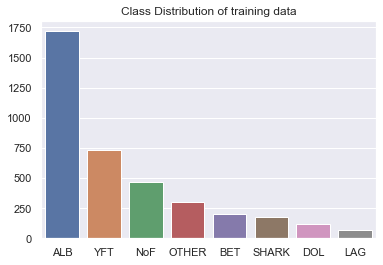

In [175]:
sns.set()
sns.barplot(x=class_distribution_labels,y=[class_distribution[i] for i in class_distribution_labels])
plt.title("Class Distribution of training data")
plt.show()

## Image Dimension Distribution for Training Set: 

### What's the most common image size for all classes?

In [189]:
image_dimensions = []
for i in CLASSES:
    for fn in glob.glob("data/train/{}/*.jpg".format(i)):
        im = Image.open(fn)
        arr = np.array(im)
        h,w,d = arr.shape
        image_dimensions.append((w,h))
image_shape_distribution = dict(Counter(image_dimensions))

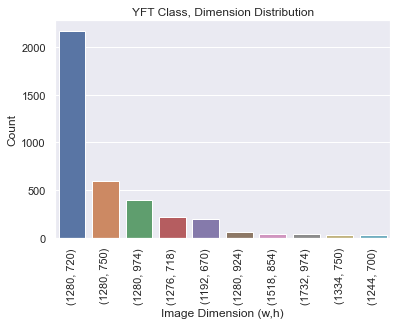

In [190]:
dimensions = sorted(image_shape_distribution, key=image_shape_distribution.get, reverse=True)
sns.barplot(x=[str(i) for i in dimensions],y=[image_shape_distribution[j] for j in dimensions])
plt.xticks(rotation=90)
plt.title("{} Class, Dimension Distribution".format(i))
plt.xlabel("Image Dimension (w,h)")
plt.ylabel("Count")
plt.show()

### What's the most common image size per class?

In [194]:
image_shape_distribution = {}
for i in CLASSES:
    print(i)
    image_dimensions = []
    for fn in glob.glob("data/train/{}/*.jpg".format(i)):
        im = Image.open(fn)
        arr = np.array(im)
        h,w,d = arr.shape
        image_dimensions.append((w,h))
    image_shape_distribution[i] = dict(Counter(image_dimensions))

ALB
BET
DOL
LAG
NoF
OTHER
SHARK
YFT


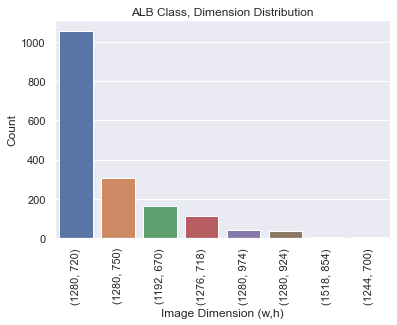

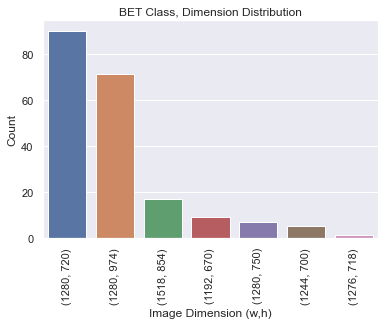

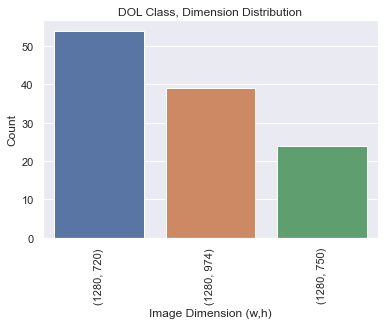

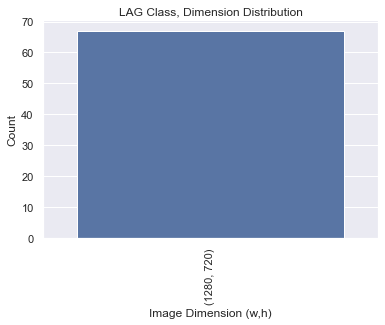

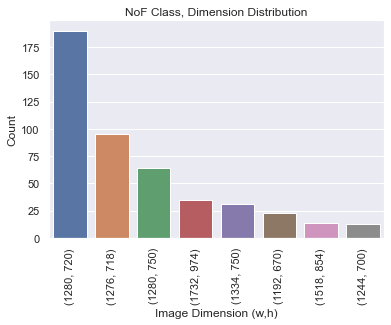

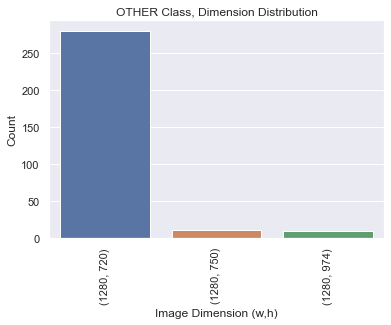

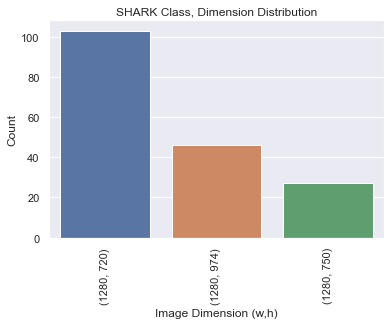

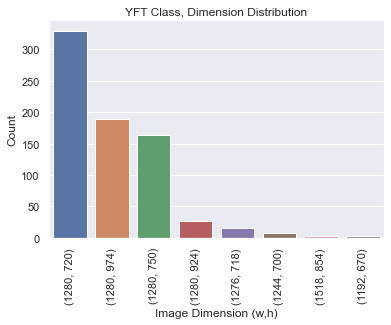

In [195]:
for i in image_shape_distribution.keys():
    dimensions = sorted(image_shape_distribution[i], key=image_shape_distribution[i].get, reverse=True)
    sns.barplot(x=[str(i) for i in dimensions],y=[image_shape_distribution[i][j] for j in dimensions])
    plt.xticks(rotation=90)
    plt.title("{} Class, Dimension Distribution".format(i))
    plt.xlabel("Image Dimension (w,h)")
    plt.ylabel("Count")
    plt.show()